In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import contextily as cx
import matplotlib.ticker as mticker

# Import the data

In [2]:
import glob

# Read all csv files from folder

df = pd.DataFrame()
for file_name in glob.glob('./../../Data_phone/final/processed_features_data/'+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    df = pd.concat([df,x],axis=0)

In [3]:
df

,lat,lon,std_acc_x,median_acc_x,std_acc_y,median_acc_y,std_acc_z,median_acc_z,std_gyr_x,median_gyr_x,std_gyr_y,median_gyr_y,std_gyr_z,median_gyr_z
0,46.844259,16.865110,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
1,46.844256,16.864807,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
2,46.844306,16.864376,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
3,46.844389,16.864009,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
4,46.844454,16.863623,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,46.825819,16.829702,0.632220,-1.736240,0.204625,-2.000289,0.418312,-2.270944,0.515803,-2.511019,0.466586,-1.637227,1.48803,-3.626552
960,46.825768,16.829632,0.000000,-1.736240,0.419741,-2.623207,0.187144,-2.974883,0.253238,-2.770386,0.173719,-1.843334,0.00000,-3.626552
961,46.825722,16.829497,0.000000,-1.736240,0.419741,-2.623207,0.187144,-2.974883,0.253238,-2.770386,0.173719,-1.843334,0.00000,-3.626552
962,46.825803,16.829329,0.000000,-1.736240,0.419741,-2.623207,0.187144,-2.974883,0.253238,-2.770386,0.173719,-1.843334,0.00000,-3.626552


In [4]:
df.describe()

,lat,lon,std_acc_x,median_acc_x,std_acc_y,median_acc_y,std_acc_z,median_acc_z,std_gyr_x,median_gyr_x,std_gyr_y,median_gyr_y,std_gyr_z,median_gyr_z
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,46.841010,16.845355,0.449269,-1.694845,0.590270,-3.580302,0.436410,-2.823844,0.570923,-3.045792,0.462240,-2.954313,0.798541,-4.264742
std,0.020788,0.012171,0.155174,0.599595,0.270682,0.850054,0.169351,0.714228,0.179948,0.803720,0.170991,0.750409,0.373009,1.043065
min,46.807867,16.818297,0.000000,-3.435322,0.000000,-5.569210,0.000000,-5.226129,0.000000,-5.674143,0.000000,-4.683077,0.000000,-6.951241
25%,46.827295,16.833651,0.350947,-2.151528,0.374016,-4.294563,0.324037,-3.312453,0.451040,-3.690286,0.355688,-3.480780,0.506804,-4.872356
50%,46.837632,16.847517,0.442740,-1.606263,0.545167,-3.545374,0.403964,-2.918580,0.564271,-3.099474,0.444705,-2.981003,0.725625,-4.220873
75%,46.846348,16.853583,0.537728,-1.267763,0.739144,-3.000636,0.512330,-2.351478,0.677264,-2.444064,0.560614,-2.410406,1.007636,-3.609313
max,46.899545,16.868996,1.335839,0.000000,2.014521,0.000000,1.411480,0.000000,1.381335,0.000000,1.443155,0.000000,2.535049,0.000000


<Axes: ylabel='Frequency'>

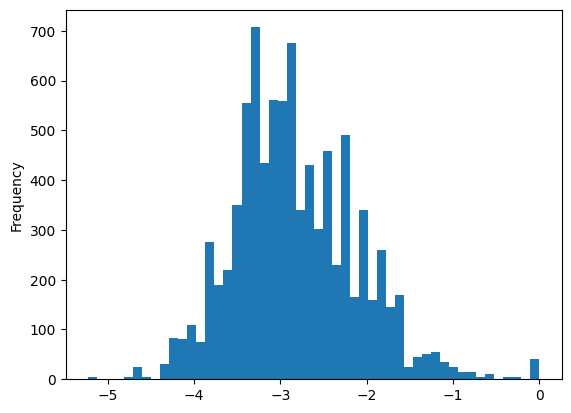

In [5]:
df['median_acc_z'].plot(kind='hist', bins=50)

In [6]:
# Remove outliers according to above histogram

df_clean = df[df['median_acc_z']<-0.5].reset_index(drop=True)
df_clean.head()

,lat,lon,std_acc_x,median_acc_x,std_acc_y,median_acc_y,std_acc_z,median_acc_z,std_gyr_x,median_gyr_x,std_gyr_y,median_gyr_y,std_gyr_z,median_gyr_z
0,46.844259,16.865110,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
1,46.844256,16.864807,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
2,46.844306,16.864376,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
3,46.844389,16.864009,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
4,46.844454,16.863623,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744


In [7]:
fig = px.scatter_mapbox(lat=df_clean['lat'], lon=df_clean['lon'], color= df_clean['median_acc_z'], zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn_r)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()

# Unsupervised Machine learning

In [8]:
# with segmentation
X = df_clean.drop(columns=['lat','lon'],axis=1)
X.columns = [0,1,2,3,4,5,6,7,8,9,10,11]

## K-Means

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.36850044356832623
For n_clusters = 3 The average silhouette_score is : 0.2641122142655589
For n_clusters = 4 The average silhouette_score is : 0.2220398388860878
For n_clusters = 5 The average silhouette_score is : 0.2361285837488984
For n_clusters = 6 The average silhouette_score is : 0.23703255339940493
For n_clusters = 7 The average silhouette_score is : 0.1987630838173469
For n_clusters = 8 The average silhouette_score is : 0.22158545144585357
For n_clusters = 9 The average silhouette_score is : 0.2256755183860267
For n_clusters = 10 The average silhouette_score is : 0.23214452121844195


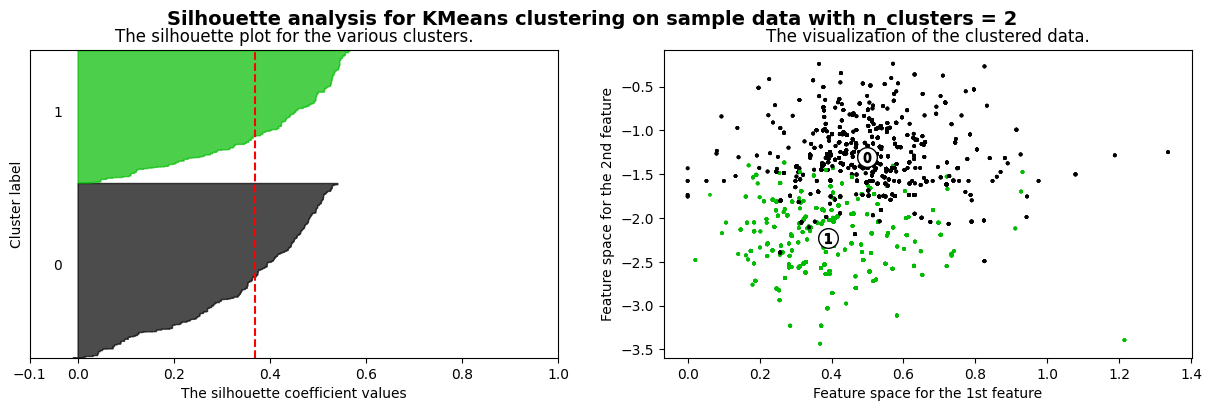

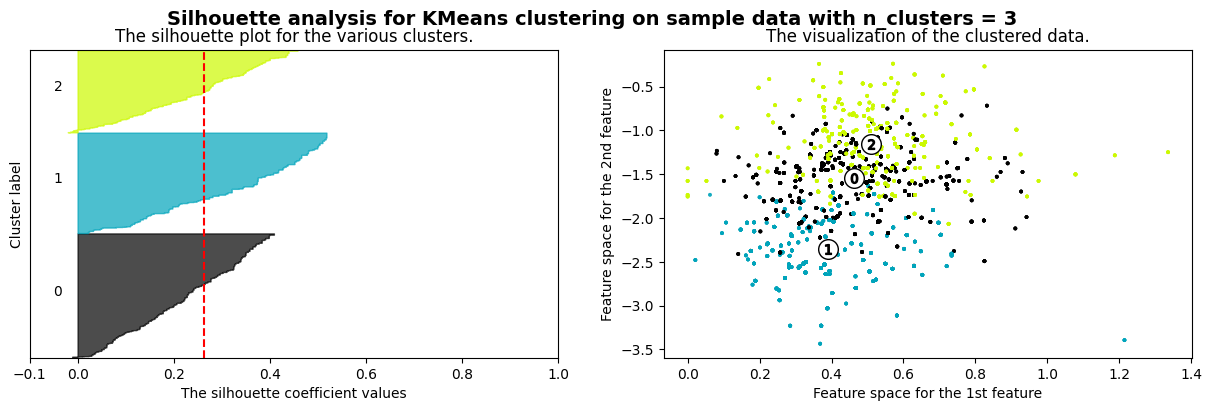

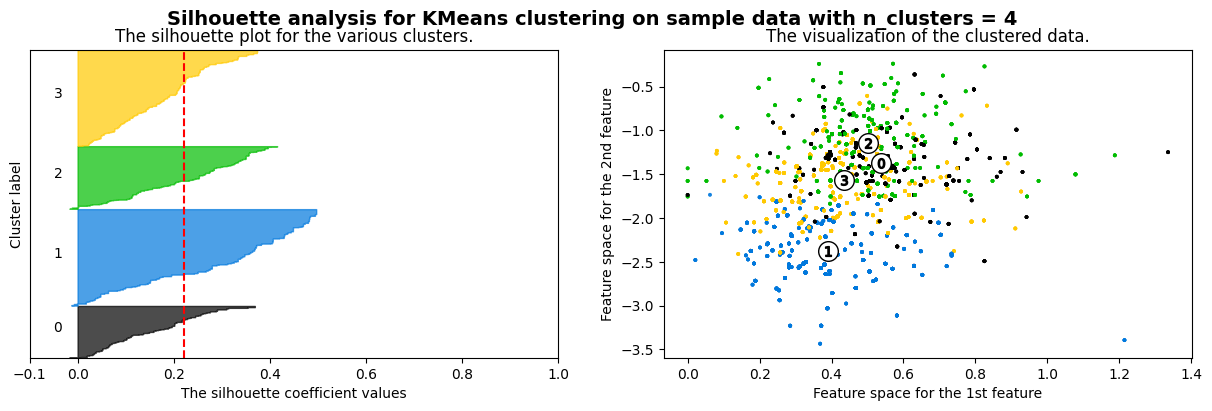

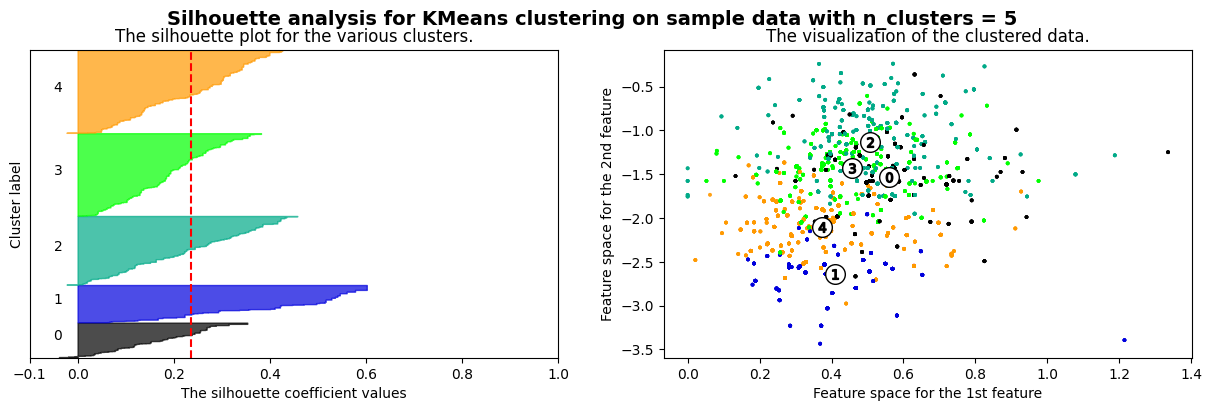

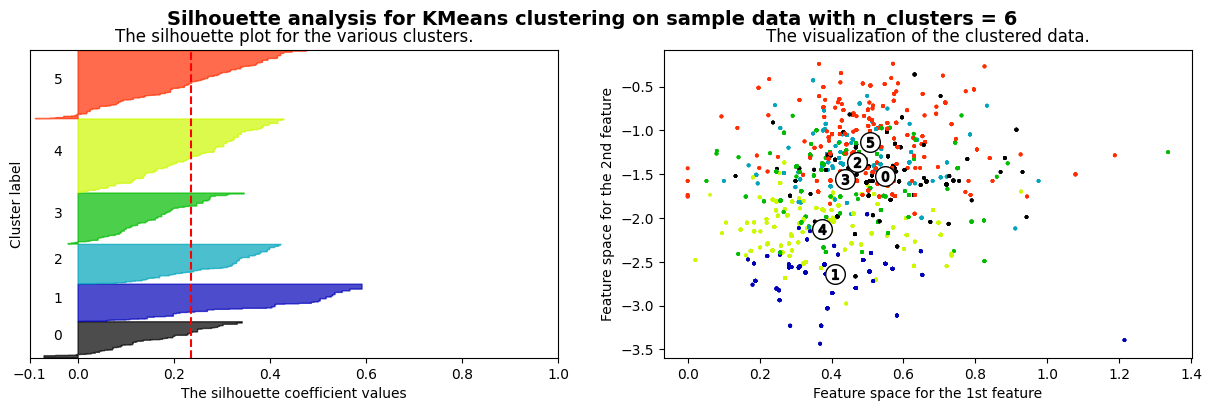

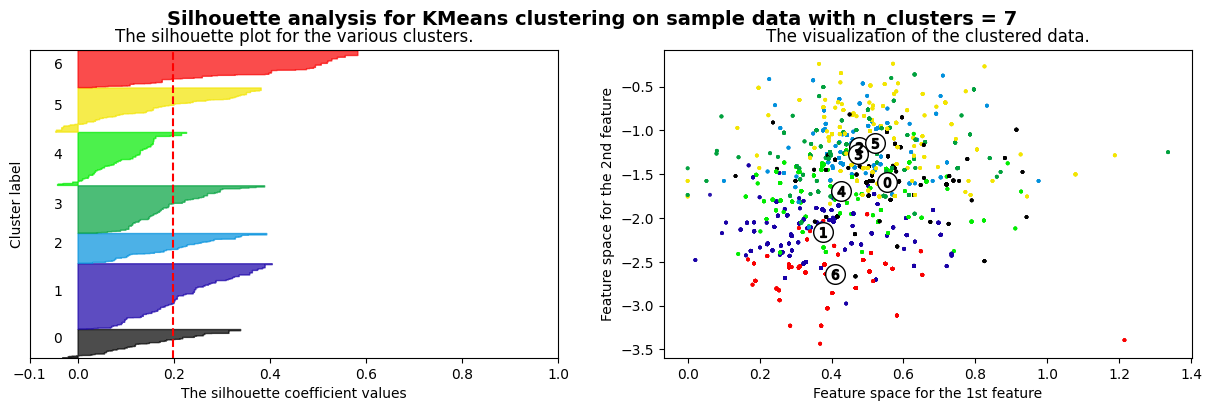

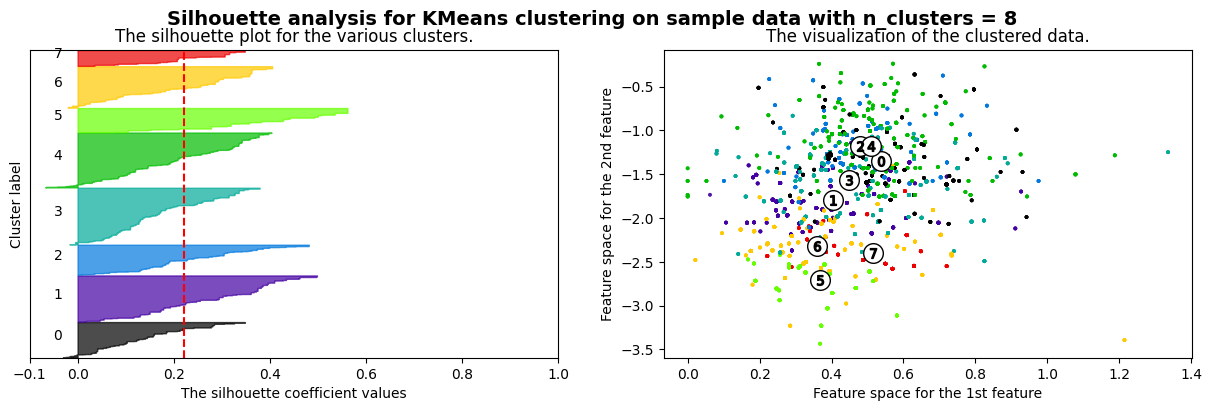

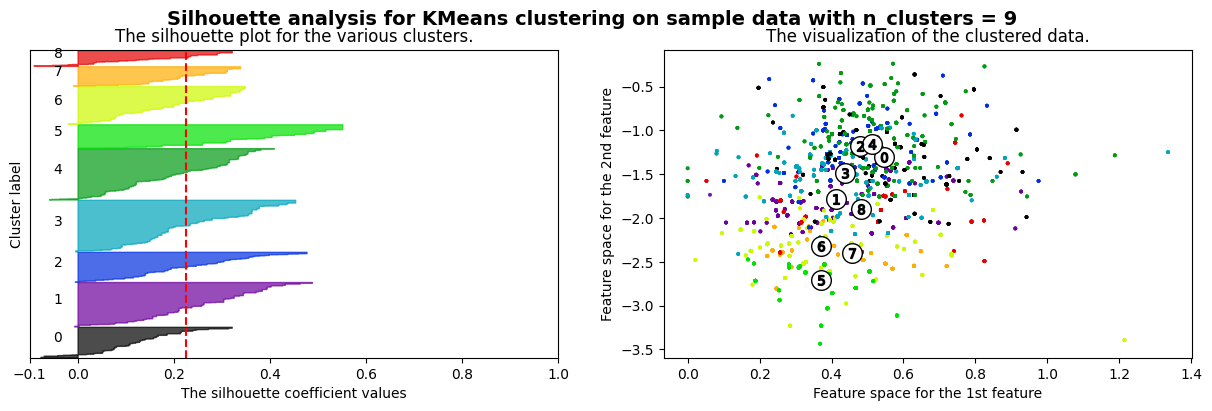

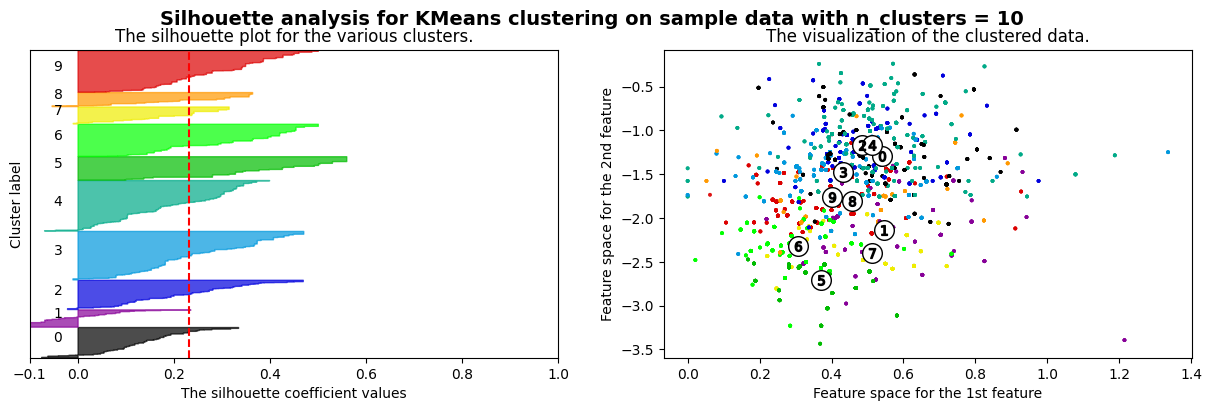

In [10]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[0], X[1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Runtime: 

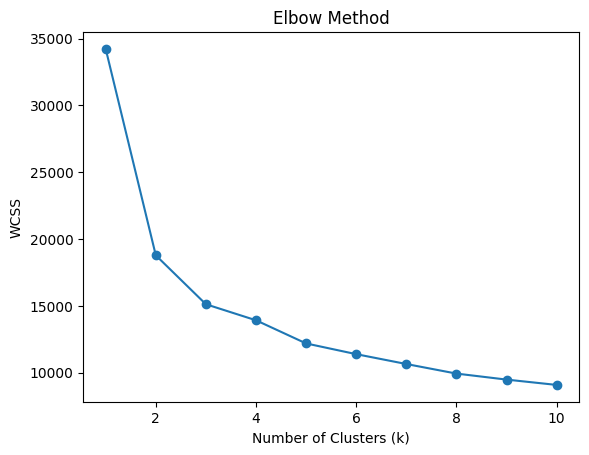

In [11]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Plot the elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [12]:
from sklearn.metrics import calinski_harabasz_score

In [13]:
kmeans = KMeans(n_clusters=4, random_state=10)
kmeans.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [14]:
calinski_harabasz_score(X, kmeans.labels_)

4234.51316753747

In [15]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)

In [16]:
kmeans_silhouette = silhouette_score(X, cluster_labels)

<Axes: >

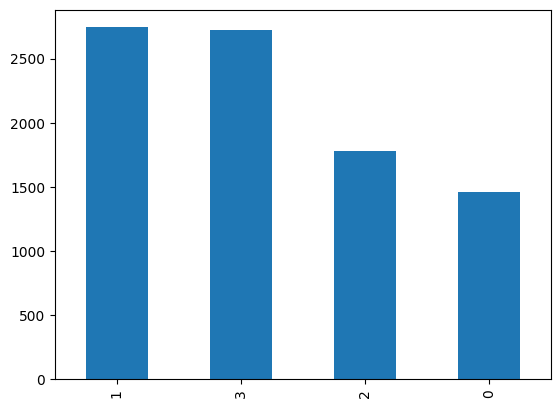

In [17]:
pd.Series(cluster_labels).value_counts().plot(kind='bar')

In [31]:
fig = px.scatter_mapbox(lat=df_clean['lat'], lon=df_clean['lon'], color = cluster_labels, zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()

## Final model

In [ ]:
# Optimal number of classes is between 4 and 6

# Future tasks: Search feature extraction methods and try another unsupervised learner models

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)

In [ ]:
cluster_labels[cluster_labels == 2] = 5
cluster_labels[cluster_labels == 0] = 2
cluster_labels[cluster_labels == 5] = 0

In [ ]:
cluster_labels[cluster_labels == 1] = 10
cluster_labels[cluster_labels == 3] = 1
cluster_labels[cluster_labels == 10] = 3

In [ ]:
cluster_labels[cluster_labels == 1] = 15
cluster_labels[cluster_labels == 0] = 1
cluster_labels[cluster_labels == 15] = 0

In [ ]:
cluster_labels[cluster_labels == 1] = 20
cluster_labels[cluster_labels == 2] = 1
cluster_labels[cluster_labels == 20] = 2

In [ ]:
# Median acceleration value per pavement class
sns.barplot(data=[df_clean[cluster_labels==0]['0'].median(), df_clean[cluster_labels==1]['0'].median(), df_clean[cluster_labels==2]['0'].median(), df_clean[cluster_labels==3]['0'].median()])

## Export labelled data

## Supervised model

In [103]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, f1_score, ConfusionMatrixDisplay, roc_auc_score

In [19]:
df_clean

,lat,lon,std_acc_x,median_acc_x,std_acc_y,median_acc_y,std_acc_z,median_acc_z,std_gyr_x,median_gyr_x,std_gyr_y,median_gyr_y,std_gyr_z,median_gyr_z
0,46.844259,16.865110,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
1,46.844256,16.864807,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
2,46.844306,16.864376,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
3,46.844389,16.864009,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
4,46.844454,16.863623,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,46.825819,16.829702,0.632220,-1.736240,0.204625,-2.000289,0.418312,-2.270944,0.515803,-2.511019,0.466586,-1.637227,1.48803,-3.626552
8709,46.825768,16.829632,0.000000,-1.736240,0.419741,-2.623207,0.187144,-2.974883,0.253238,-2.770386,0.173719,-1.843334,0.00000,-3.626552
8710,46.825722,16.829497,0.000000,-1.736240,0.419741,-2.623207,0.187144,-2.974883,0.253238,-2.770386,0.173719,-1.843334,0.00000,-3.626552
8711,46.825803,16.829329,0.000000,-1.736240,0.419741,-2.623207,0.187144,-2.974883,0.253238,-2.770386,0.173719,-1.843334,0.00000,-3.626552


In [20]:
len(cluster_labels)

8713

In [21]:
ml = pd.concat([df_clean.reset_index(drop=True), pd.DataFrame(cluster_labels)], axis=1)

In [22]:
ml.drop_duplicates(subset='std_acc_x', inplace=True)

In [23]:
ml

,lat,lon,std_acc_x,median_acc_x,std_acc_y,median_acc_y,std_acc_z,median_acc_z,std_gyr_x,median_gyr_x,std_gyr_y,median_gyr_y,std_gyr_z,median_gyr_z,0
0,46.844259,16.865110,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.411630,-3.389744,0
40,46.844407,16.856113,0.754784,-1.576468,0.667534,-3.509393,0.692952,-2.226210,0.263028,-3.165346,0.409176,-2.747072,1.229173,-3.147026,0
45,46.844208,16.855971,0.697480,-2.054241,1.019697,-5.025059,0.773841,-3.857923,0.451040,-4.013648,0.534790,-3.496103,1.580200,-4.898088,1
75,46.843222,16.855323,0.927303,-1.697716,0.267586,-4.241144,0.822179,-2.522654,0.457872,-3.679649,0.560166,-3.177479,0.908812,-4.844123,3
80,46.843093,16.855222,0.247173,-2.805392,0.505024,-4.549303,0.215797,-3.594274,0.443411,-4.011566,0.133768,-3.797821,0.454628,-5.587776,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8609,46.828737,16.830544,0.396575,-1.265269,0.417871,-3.305410,0.654389,-2.337116,0.811619,-3.121993,0.633577,-2.054739,0.576434,-2.922279,0
8634,46.828046,16.830408,0.138187,-0.971090,0.359507,-2.582696,0.859093,-0.938292,0.177399,-3.073909,0.158023,-2.181394,0.716343,-3.497237,2
8639,46.827911,16.830379,0.478576,-1.285346,0.235001,-3.357306,0.304290,-2.377527,0.573219,-3.250334,0.370609,-2.418468,0.867283,-2.856290,0
8679,46.826818,16.830140,0.410057,-1.334956,0.353789,-3.504512,0.395440,-2.774136,0.526858,-3.938349,0.355495,-2.614964,0.957036,-2.971444,0


In [182]:
X = ml.drop(columns=['lat','lon',0],axis=1)
y = ml[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
model = RandomForestClassifier(n_estimators=100,random_state=101)

#model = GradientBoostingClassifier(n_estimators=100)

In [45]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

[Text(0.5, 0, 'Prediktált címke'), Text(0, 0.5, 'Valós címke')]

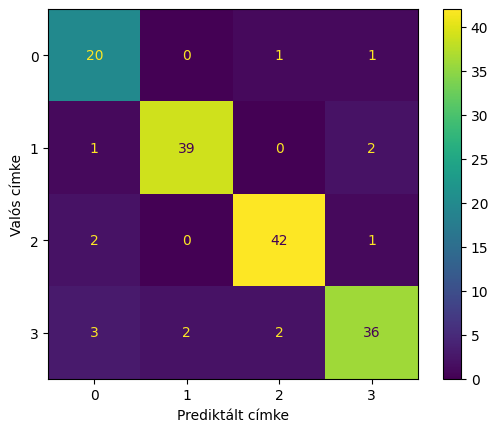

In [49]:
preds = model.predict(X_test)

cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
disp.ax_.set(xlabel='Prediktált címke', ylabel='Valós címke')

Text(448.4027777777778, 0.5, 'Hatvány-alapú skála [%]')

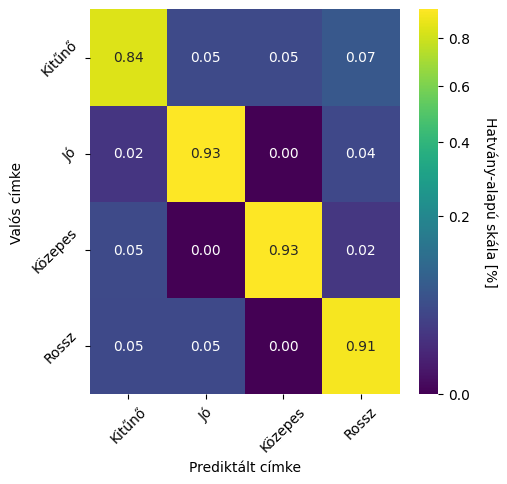

In [180]:
from matplotlib.colors import PowerNorm

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
#sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Excellent', 'Good', 'Fair', 'Poor'], yticklabels=['Excellent', 'Good', 'Fair', 'Poor'])#np.unique(y_test))
heatmap = sns.heatmap(np.fliplr(np.flipud(cmn)),  annot=True, fmt='.2f', xticklabels=['Kitűnő', 'Jó', 'Közepes', 'Rossz'], yticklabels=['Kitűnő', 'Jó', 'Közepes', 'Rossz'], norm=PowerNorm(gamma=0.5), cmap="viridis") #or crest_r cmap
ax.set_xlabel('Prediktált címke')
ax.set_ylabel('Valós címke')

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=45)
#ax.show(block=False)

# Customize the colorbar
colorbar = heatmap.collections[0].colorbar
colorbar.ax.set_ylabel('Hatvány-alapú skála [%]', rotation=270, labelpad=20)

In [174]:
np.unique(ml[0])

array([0, 1, 2, 3], dtype=int32)

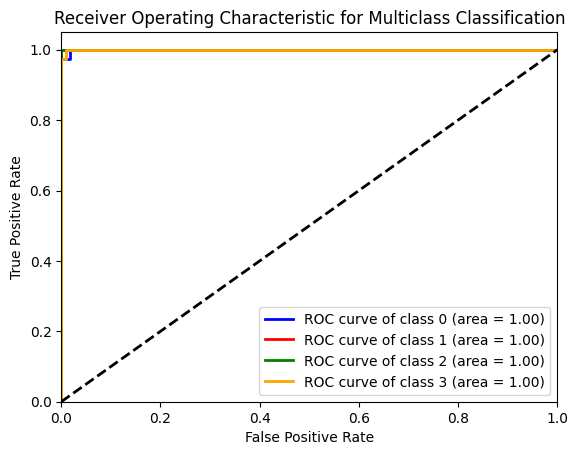

In [176]:
# First aggregate all false positive rates

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
n_classes = len(np.unique(ml[0]))  # Number of unique classes
y_bin = label_binarize(ml[0], classes=np.arange(n_classes))

# Split into train and test (assuming you haven't already)
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust colors for your classes

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()



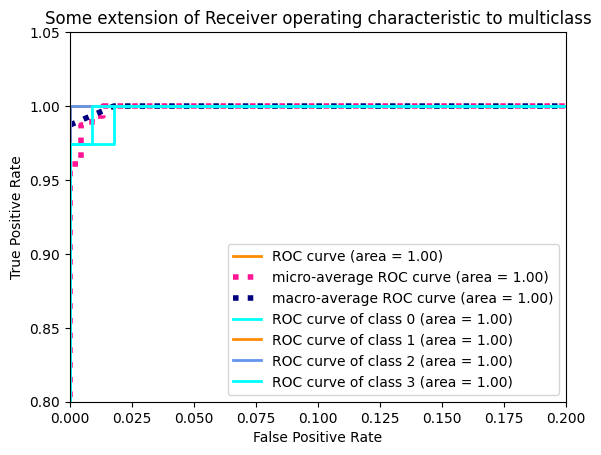

In [177]:
# https://scikit-learn.org/1.0/auto_examples/model_selection/plot_roc.html

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)

# Plot all ROC curves
#plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 0.2])
plt.ylim([0.8, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [178]:
# Calculate average ROC AUC score across all classes
average_roc_auc = np.mean(list(roc_auc.values()))

# Print the average ROC AUC score
print("Average ROC AUC score: {:.2f}".format(average_roc_auc))

Average ROC AUC score: 1.00


In [179]:
y_prob = model.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.999830 (macro),
0.999825 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.999830 (macro),
0.999825 (weighted by prevalence)


In [196]:
# Data36 klub ML modellek kiertekelese eloadas alapjan:

#Predict probabilities
probabilities = model.predict_proba(X_test)
probabilities[:5]

array([[0.63, 0.  , 0.29, 0.08],
       [0.65, 0.  , 0.01, 0.34],
       [0.06, 0.  , 0.8 , 0.14],
       [0.01, 0.96, 0.  , 0.03],
       [0.01, 0.96, 0.  , 0.03]])

In [200]:
def myfunction(x):
    return max(x)
confidence = np.apply_along_axis(myfunction, axis=1, arr=probabilities)

<Axes: >

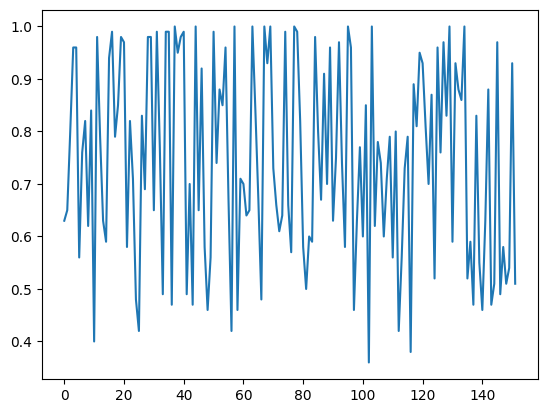

In [203]:
# Confidence of classification
sns.lineplot(confidence)

<Axes: ylabel='Count'>

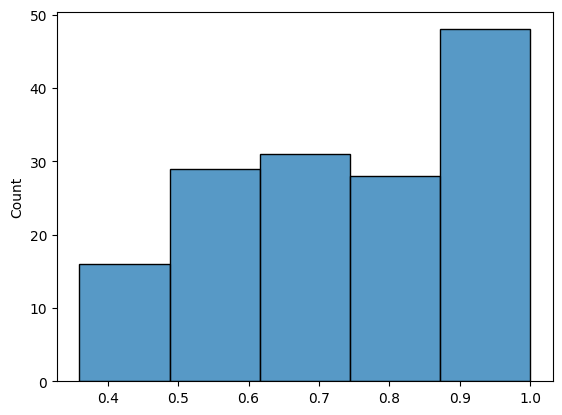

In [205]:
sns.histplot(confidence, bins=5)

In [192]:
y_test[:5]

235     0
5174    3
1485    2
80      1
2510    1
Name: 0, dtype: int32

In [185]:
poor_vs_others_test = np.where(y_test==0, 1, 0)
poor_vs_others_num_pred_test = model.predict_proba(X_test)[:, 0]
roc_auc_score(poor_vs_others_test, poor_vs_others_num_pred_test)

0.9874125874125874

In [186]:
bad_vs_others_test = np.where(y_test==1, 1, 0)
bad_vs_others_num_pred_test = model.predict_proba(X_test)[:, 1]
roc_auc_score(bad_vs_others_test, bad_vs_others_num_pred_test)

0.9943722943722944

In [190]:
good_vs_others_test = np.where(y_test==2, 1, 0)
good_vs_others_num_pred_test = model.predict_proba(X_test)[:, 2]
roc_auc_score(good_vs_others_test, good_vs_others_num_pred_test)

0.994184839044652

In [191]:
perfect_vs_others_test = np.where(y_test==3, 1, 0)
perfect_vs_others_num_pred_test = model.predict_proba(X_test)[:, 3]
roc_auc_score(perfect_vs_others_test, perfect_vs_others_num_pred_test)

0.9773842543204608

In [48]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.95      0.93      0.94        42
           2       0.93      0.93      0.93        45
           3       0.90      0.84      0.87        43

    accuracy                           0.90       152
   macro avg       0.89      0.90      0.89       152
weighted avg       0.91      0.90      0.90       152



In [102]:
print(accuracy_score(y_test, preds))

0.9013157894736842


In [107]:
print(f1_score(y_test, preds, average='macro'))

0.8934738955823294


In [165]:
print(roc_auc_score(y_test, preds))

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 2 1 1 3 3 0 1 1 0 2 0 1 3 2 2 1 3 2 1 0 2 0 1 3 2 1 2 1 3 2 2 1 1 1 3
 1 2 1 1 0 0 3 2 2 2 3 0 3 1 2 2 1 1 2 2 1 0 2 2 3 3 2 1 3 2 1 1 2 3 0 0 2
 2 1 2 2 2 2 3 0 1 1 2 3 3 2 1 3 3 3 2 3 2 1 0 3 0 1 3 3 3 2 2 3 1 3 3 1 1
 2 3 2 3 3 0 2 0 1 2 2 3 1 0 0 2 1 3 1 3 2 0 0 1 2 3 1 3 0 3 2 0 1 0 3 3 2
 0 3 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<Axes: >

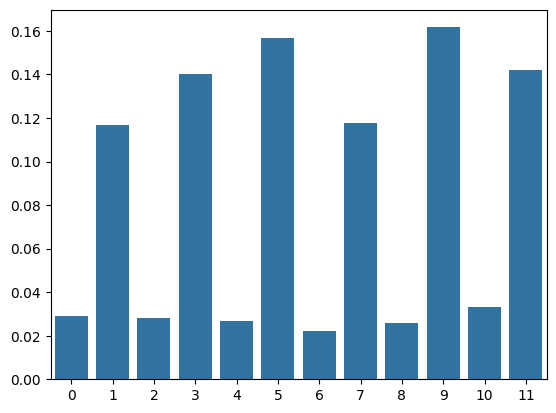

In [155]:
sns.barplot(model.feature_importances_)

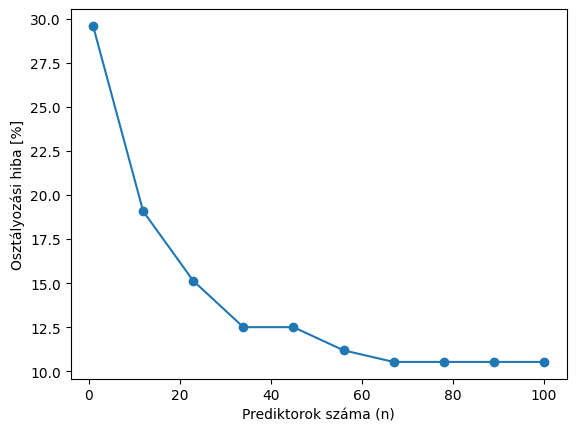

In [144]:
accuracy = []
for n in np.linspace(1, 100, 10, dtype=int):
    forest = RandomForestClassifier(n_estimators=n, random_state=0)
    forest.fit(X_train,y_train)
    y_pred_test = forest.predict(X_test)
    accuracy.append((1- accuracy_score(y_test, y_pred_test))*100)
# Plot the elbow method
plt.plot(np.linspace(1, 100, 10), accuracy, marker='o')
plt.xlabel('Prediktorok száma (n)')
plt.ylabel('Osztályozási hiba [%]')
#plt.title('Elbow Method')
plt.show()

In [138]:
np.linspace(1, 100, 10, dtype=int)

array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])